In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import pandas as pd
import matplotlib.tri as tri
import csv
import sys
import os
import pandas
from sklearn import preprocessing

def plot_spectrum(s,cadence):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence
    plt.xlabel("Timescale in days") ## for 1/f
    plt.ylabel("Power Coefficient")

In [2]:
def plot_sim(sim_data):

    #normalizing tesscurve
    dataset = pd.read_csv(str(sim_data))
    time = dataset.iloc[:, 0].values
    flux = dataset.iloc[:,1].values
    print(dataset)
    time_start_0 = time#[value - time[0] for value in time] #make time start at 0
    
    std_mult = 0.010669393070550186 / np.std(flux)
    flux = flux * std_mult

    #plotting lightcurve
    plt.scatter(time_start_0,flux, s = 5)
    plt.show()

    #plotting power spectrum
    cadence = time[1]-time[0]
    plot_spectrum(flux,cadence) #plot as a line 1/frequencies # blue
    plt.show()

    print("cadence in days: " , cadence)
    print("Tess data len: " , len(flux))
    print("Standard dev: " , np.std(flux))


    #TESS noise sigma comparison


    #sigma is the standard deviation of the means of a bin given a bin size
    binsizes = (1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024)
    binned_sigma = []
    
    for binsize in binsizes:
        nbins = len(flux) / binsize # if the binsize is n long, then nbins is the length of flux divided by n binsize
        means = np.zeros(int(nbins))
        for i in range (0, int(nbins)):

            fluxpiece = flux[int((i*binsize)):int((i+1)*binsize)]
            means[i]= np.average(fluxpiece)

        std_means = np.std(means)
        binned_sigma.append(std_means)
    print('binned_sigmas' +str(binned_sigma))


    std = np.std(flux)
    ideal_sigma_1 = std / (1 **(1/2))
    ideal_sigma_2 = std / (2 ** (1/2))
    ideal_sigma_4 = std / (4 ** (1/2))
    ideal_sigma_8 = std / (8 ** (1/2))
    ideal_sigma_16 = std / (16 ** (1/2))
    ideal_sigma_32 = std / (32 ** (1/2))
    ideal_sigma_64 = std / (64 ** (1/2))
    ideal_sigma_128 = std / (128 ** (1/2))
    ideal_sigma_256 = std / (256 ** (1/2))
    ideal_sigma_512 = std / (512 ** (1/2))
    ideal_sigma_1024 = std / (1024 ** (1/2))

    ideal_sigmas = np.array([ideal_sigma_1, ideal_sigma_2, ideal_sigma_4, ideal_sigma_8, ideal_sigma_16, ideal_sigma_32, ideal_sigma_64, ideal_sigma_128, ideal_sigma_256, ideal_sigma_512, ideal_sigma_1024])
    print('ideal_sigmas' + str(ideal_sigmas))


    print(str(sim_data))
    plt.xlabel("N value")
    plt.ylabel("Sigma")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim()
    plt.plot(binsizes, ideal_sigmas)
    plt.plot(binsizes,binned_sigma)

       0.000000000000000  6.801546812057496e-05
0               0.001389               0.000136
1               0.002778               0.000119
2               0.004167               0.000007
3               0.005556              -0.000077
4               0.006944               0.000039
...                  ...                    ...
29982          41.643056               0.000099
29983          41.644444               0.000180
29984          41.645833               0.000102
29985          41.647222               0.000060
29986          41.648611              -0.000049

[29987 rows x 2 columns]


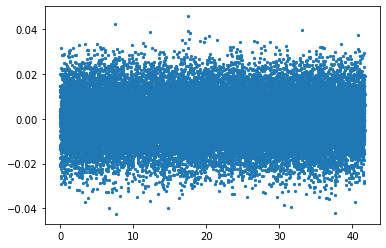

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_10204/3623642658.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


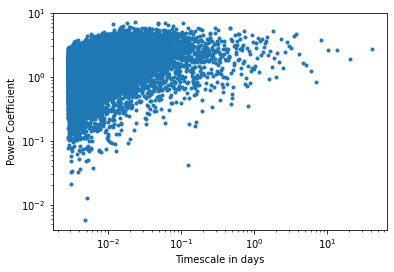

cadence in days:  0.0013888888888888998
Tess data len:  29987
Standard dev:  0.010669393070550186
binned_sigmas[0.010669393070550186, 0.008849046385011185, 0.007007675333627769, 0.005288198366231885, 0.003818133760441127, 0.0027140209829601175, 0.001918172837454181, 0.001342794651056201, 0.0010350681906819796, 0.0007333679675152588, 0.0004700196682921131]
ideal_sigmas[0.01066939 0.0075444  0.0053347  0.0037722  0.00266735 0.0018861
 0.00133367 0.00094305 0.00066684 0.00047153 0.00033342]
fake_data_autocor_tau1.csv


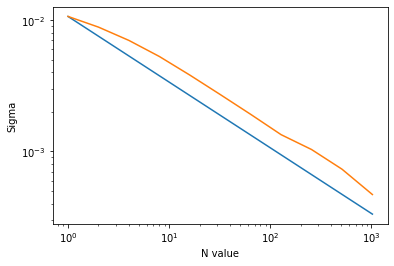

In [3]:
plot_sim('fake_data_autocor_tau1.csv')

       0.000000000000000  -1.28673210740089E-05
0               0.000000              -0.000013
1               0.001389               0.000068
2               0.002778              -0.000106
3               0.004167              -0.000084
4               0.005556              -0.000127
...                  ...                    ...
29983          41.643056               0.000059
29984          41.644444               0.000132
29985          41.645833               0.000080
29986          41.647222               0.000068
29987          41.648611              -0.000071

[29988 rows x 2 columns]


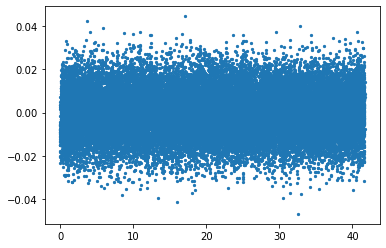

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_10204/3623642658.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


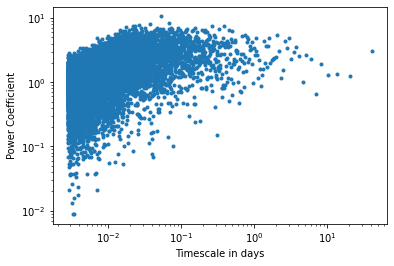

cadence in days:  0.0013888888888888
Tess data len:  29988
Standard dev:  0.010669393070550186
binned_sigmas[0.010669393070550186, 0.0092687317423198, 0.007752920528163721, 0.0061034638431657845, 0.004548764141193523, 0.003156311773496394, 0.0022094188552513497, 0.0015321504880758533, 0.0010637242422685076, 0.0006921841429429833, 0.00043264617079929736]
ideal_sigmas[0.01066939 0.0075444  0.0053347  0.0037722  0.00266735 0.0018861
 0.00133367 0.00094305 0.00066684 0.00047153 0.00033342]
fake_data_autocor_tau1.5.csv


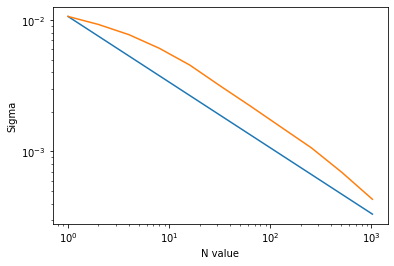

In [4]:
plot_sim('fake_data_autocor_tau1.5.csv')

       0.000000000000000  5.930997133255E-05
0               0.000000            0.000059
1               0.001389           -0.000005
2               0.002778           -0.000006
3               0.004167           -0.000109
4               0.005556           -0.000143
...                  ...                 ...
29983          41.643056            0.000171
29984          41.644444            0.000136
29985          41.645833            0.000086
29986          41.647222            0.000046
29987          41.648611            0.000054

[29988 rows x 2 columns]


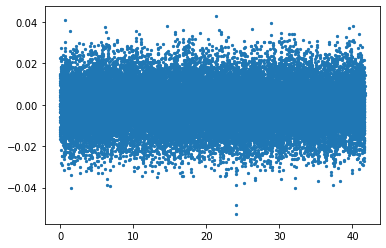

/var/folders/m_/l_xwjgkd4dn3xl_27hw7d3sh0000gn/T/ipykernel_10204/3623642658.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.loglog(1/f * cadence, np.abs(np.fft.rfft(s)),'.') #mult times cadence


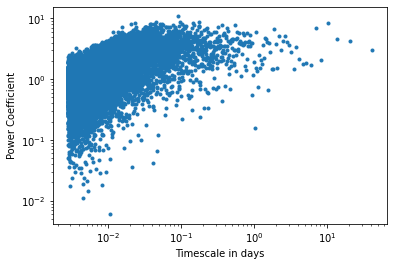

cadence in days:  0.0013888888888888
Tess data len:  29988
Standard dev:  0.010669393070550185
binned_sigmas[0.010669393070550185, 0.009549948077600906, 0.008242428918498561, 0.006743016312647062, 0.005200427771976521, 0.003700981220071284, 0.002628062067646386, 0.0019243373204972782, 0.0013611274496594513, 0.00102984572616222, 0.0006933810399298692]
ideal_sigmas[0.01066939 0.0075444  0.0053347  0.0037722  0.00266735 0.0018861
 0.00133367 0.00094305 0.00066684 0.00047153 0.00033342]
fake_data_autocor_tau2.csv


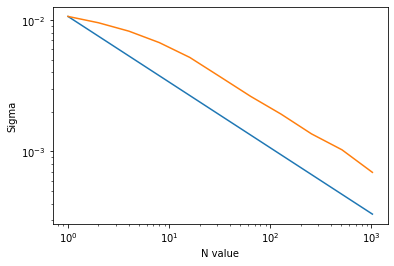

In [5]:
plot_sim('fake_data_autocor_tau2.csv')